In [3]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from scipy import spatial
from matplotlib import cm as CM
from image import *
#from model import CSRNet
import torch
%matplotlib inline

In [4]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))
    leafsize = 2048
    # build kdtree
    tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

In [5]:
#set the root to the Shanghai dataset you download
root = 'ShanghaiTech/'

In [6]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_train,part_A_test]

In [7]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [8]:
img_paths[0].replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_')

'../../DL/course_project/ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_10.mat'

In [75]:
'''
img_path = img_paths[0]
mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
img= plt.imread(img_path)
k = np.zeros((img.shape[0],img.shape[1]))
gt = mat["image_info"][0,0][0,0][0]
for i in range(0,len(gt)):
    if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
        k[int(gt[i][1]),int(gt[i][0])]=1
# k = gaussian_filter_density(k)
print(gt.shape)
density = np.zeros(gt.shape, dtype=np.float32)
gt_count = np.count_nonzero(gt)
pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))

leafsize = 2048
# # build kdtree
tree = spatial.KDTree(pts.copy(), leafsize=leafsize)
# # query kdtree
distances, locations = tree.query(pts, k=4)
tree
'''

(920, 2)


In [77]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_10.jpg
(683, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_38.jpg
(566, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_117.jpg
(579, 840)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_103.jpg
(400, 400)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_249.jpg
(451, 800)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_1.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_261.jpg
(359, 478)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_275.jpg
(270, 360)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_274.jpg
(681, 1024)
generate density...
done.
.

generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_161.jpg
(480, 640)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_175.jpg
(360, 640)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_149.jpg
(683, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_66.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_72.jpg
(663, 962)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_99.jpg
(688, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_64.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_70.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_58.jpg
(681, 1024)
g

done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_154.jpg
(416, 624)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_168.jpg
(944, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_47.jpg
(662, 962)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_53.jpg
(662, 962)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_84.jpg
(435, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_90.jpg
(576, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_86.jpg
(387, 580)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_92.jpg
(1024, 832)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_45.jpg
(600, 903)
generate density...
done

done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_81.jpg
(282, 377)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_95.jpg
(600, 800)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_31.jpg
(1024, 768)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_25.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_19.jpg
(600, 900)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_136.jpg
(500, 666)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_122.jpg
(787, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_8.jpg
(465, 700)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_268.jpg
(600, 900)
generate density...
done.

done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_126.jpg
(576, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_132.jpg
(800, 600)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_21.jpg
(766, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_35.jpg
(653, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_10.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_38.jpg
(683, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_117.jpg
(600, 900)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_103.jpg
(666, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_1.jpg
(704, 1024)
generate density...
done.

done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_89.jpg
(534, 800)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_76.jpg
(450, 676)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_62.jpg
(480, 624)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_171.jpg
(687, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_165.jpg
(681, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_159.jpg
(580, 882)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_158.jpg
(428, 594)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_164.jpg
(265, 701)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_170.jpg
(687, 1024)
generate density...
done.
../.

done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_122.jpg
(760, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_8.jpg
(684, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_9.jpg
(768, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_123.jpg
(276, 460)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_137.jpg
(299, 449)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_18.jpg
(681, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_24.jpg
(633, 1024)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_30.jpg
(511, 766)
generate density...
done.
../../DL/course_project/ShanghaiTech/part_A/test_data/images/IMG_26.jpg
(293, 450)
generate density...
done.
../../D

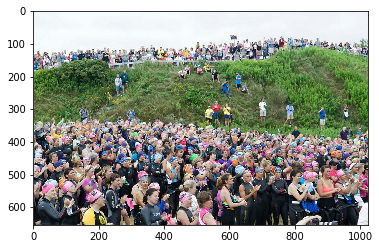

In [11]:
#now see a sample from ShanghaiA
plt.imshow(Image.open('../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_100.jpg'))

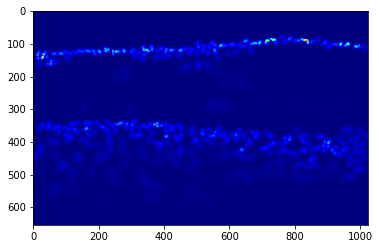

In [12]:
gt_file = h5py.File('../../DL/course_project/ShanghaiTech/part_A/train_data/images/IMG_100.jpg'.replace('.jpg','.h5').replace('images','ground-truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [13]:
np.sum(groundtruth)# don't mind this slight variation

370.0633

In [82]:
#now generate the ShanghaiB's ground truth
path_sets = [part_B_train,part_B_test]

In [83]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [85]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground-truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter(k,15)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground-truth'), 'w') as hf:
            hf['density'] = k

../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_329.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_315.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_301.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_10.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_38.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_117.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_103.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_249.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_1.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_261.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_275.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_274.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_260.jpg
../../DL/course_project/ShanghaiTech/part_

../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_177.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_188.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_229.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_215.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_201.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_200.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_214.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_228.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_189.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_176.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_162.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_59.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_71.jpg
../../DL/course_project/ShanghaiTech/par

../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_235.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_209.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_194.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_180.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_157.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_143.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_396.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_382.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_78.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_50.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_44.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_355.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_341.jpg
../../DL/course_project/ShanghaiTech/part

../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_109.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_121.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_135.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_257.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_243.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_294.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_280.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_281.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_295.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_242.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_256.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_134.jpg
../../DL/course_project/ShanghaiTech/part_B/train_data/images/IMG_120.jpg
../../DL/course_project/ShanghaiTech/p

../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_299.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_266.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_6.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_272.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_138.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_110.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_104.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_17.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_312.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_306.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_310.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_304.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_29.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/i

../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_154.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_168.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_47.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_53.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_84.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_90.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_86.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_92.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_45.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_51.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_79.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_142.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_156.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images

../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_120.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_108.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_33.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_27.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_23.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_37.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_124.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_130.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_118.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_252.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_246.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_291.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/images/IMG_285.jpg
../../DL/course_project/ShanghaiTech/part_B/test_data/i